In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys
import time
import glob

In [2]:
objp = np.zeros((9 * 15, 3), np.float32)
objp[:, :2] = np.mgrid[0:15, 0:9].T.reshape(-1, 2)  # 将世界坐标系建在标定板上，所有点的Z坐标全部为0，所以只需要赋值x和y
objp = 1.467 * objp   # 打印棋盘格一格的边长为1.467cm
obj_points = []     # 存储3D点
img_points = []     # 存储2D点
# date = "2023_12_30"
images=glob.glob("/home/yuruihan/DS-FaceScape/ldr_emitter_rotation/calib_obj/*.JPG")  #黑白棋盘的图片路径
 
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    size = gray.shape[::-1]
    ret, corners = cv2.findChessboardCorners(gray, (15, 9), None)
    print(ret)
    if ret:
        obj_points.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 30, 0.001))  
        if [corners2]:
            img_points.append(corners2)
        else:
            img_points.append(corners)
        # cv2.drawChessboardCorners(img, (15, 9), corners, ret)  # 记住，OpenCV的绘制函数一般无返回值
        # cv2.waitKey(1)
_, mtx, dist, _, _ = cv2.calibrateCamera(obj_points, img_points, size, None, None)
 
# 内参数矩阵
Camera_intrinsic = {"mtx": mtx,"dist": dist,}

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [3]:
Camera_intrinsic['mtx']

array([[1.38667364e+04, 0.00000000e+00, 3.01553984e+03],
       [0.00000000e+00, 1.38578563e+04, 1.77834602e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

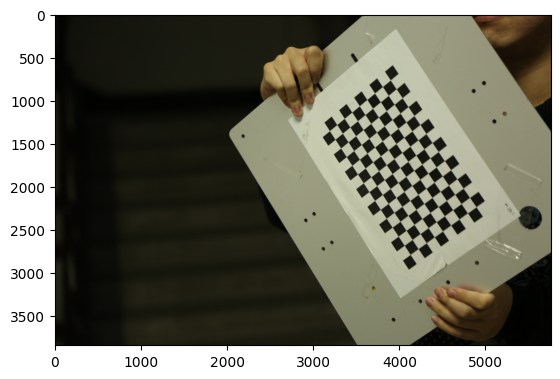

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



In [5]:
# save the image
cv2.imwrite('H:/HDR/2023_12_29/camera_intrinsic.png', img)

False